Dataset

In [175]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

faceDf = fetch_olivetti_faces()

# Splitting
X = faceDf.images
y = faceDf.target

Visualize 10 Random Images w/ Corresponding Person IDs

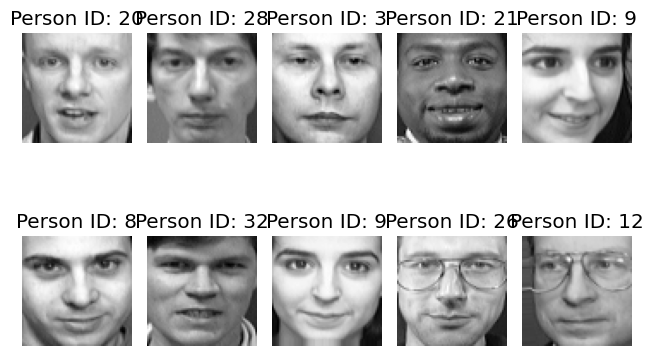

In [176]:
np.random.seed(42)

rand_indices = np.random.choice(len(X), 10, replace=False)

for i, idx in enumerate(rand_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[idx], cmap='gray')
    plt.title(f"Person ID: {y[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Prerocessing

In [177]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_flat = X.reshape((X.shape[0], -1))
X_flat = ss.fit_transform(X_flat)
X_flat.shape

(400, 4096)

Train Test Split

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, random_state=42, test_size=0.2)

Dimensional Reduct

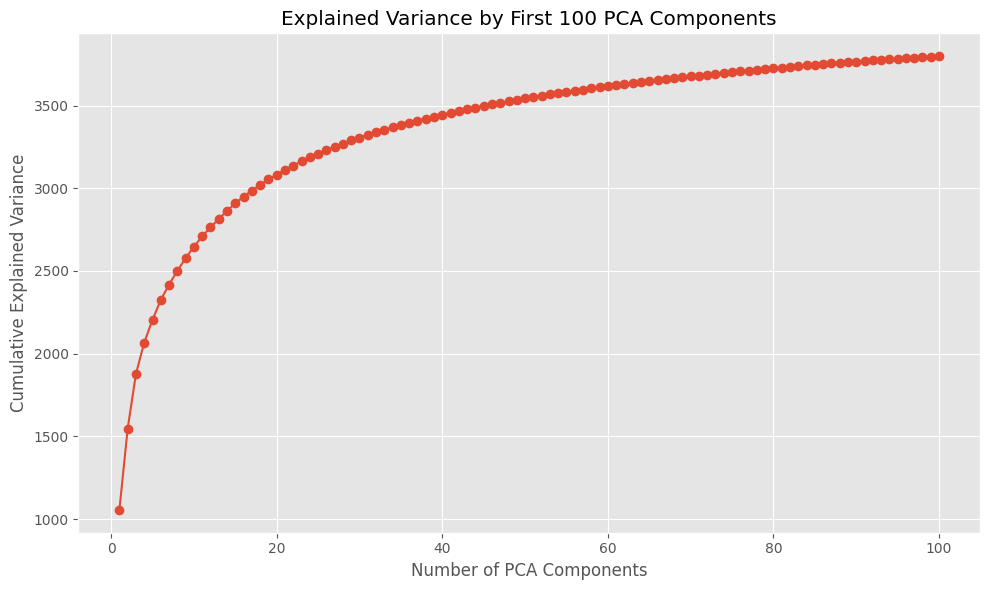

In [179]:
from sklearn.decomposition import PCA

n = min(100, X_train.shape[0], X_train.shape[1])
pca = PCA(n_components=n)
pca.fit(X_train)

varienceRation = pca.explained_variance_ratio_
cumulaticeVareince = np.cumsum(pca.explained_variance_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulaticeVareince) + 1), cumulaticeVareince, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'Explained Variance by First {len(cumulaticeVareince)} PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()

Model Training

In [180]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [181]:
from sklearn.neighbors import KNeighborsClassifier
K = 4
knc = KNeighborsClassifier(n_neighbors= K)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Model Evaluate

Logistic Regression

In [182]:
from sklearn.metrics import classification_report as cr
yPred1 = LogReg.predict(X_test)
report1 = cr(y_test, yPred1, labels=[0,1,2,3,4,5])
print(f"Prediction Accuracy of Logistic Regression = {report1}")

Prediction Accuracy of Logistic Regression =               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



Text(0, 0.5, 'Test Label')

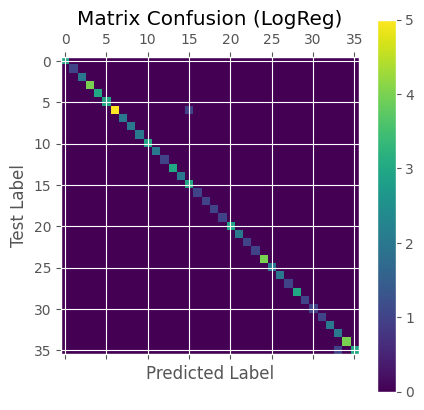

In [183]:
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(y_test, yPred1)
plt.matshow(matrix1)
plt.colorbar()
plt.title("Matrix Confusion (LogReg)")
plt.xlabel("Predicted Label")
plt.ylabel("Test Label")

KNN

In [184]:
yPred2 = knc.predict(X_test)
report2 = cr(y_test, yPred2, labels=[0,1,2,3,4,5])
print(f"Prediction Accuracy of KNN: {report2}")

Prediction Accuracy of KNN:               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2
           3       0.75      0.75      0.75         4
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3

   micro avg       0.78      0.88      0.82        16
   macro avg       0.81      0.90      0.85        16
weighted avg       0.79      0.88      0.82        16



Text(0, 0.5, 'Test Label')

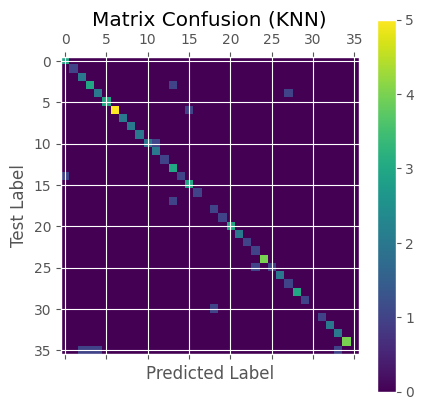

In [188]:
from sklearn.metrics import confusion_matrix
matrix2 = confusion_matrix(y_test, yPred2)
plt.matshow(matrix2)
plt.colorbar()
plt.title("Matrix Confusion (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("Test Label")

Easiest & Hardest ID to Recognize

Logistic Regression

In [196]:
import pandas as pd

perclass_acc1 = matrix1.diagonal()/matrix1.sum(axis=1)

personAcc1 = pd.DataFrame({
    "Person ID":np.arange(len(perclass_acc1)),
    "Accuracy": perclass_acc1
})  

personAcc1 = personAcc1.sort_values(by="Accuracy", ascending=False)

print("Easiest to recognize (highest accuracy):")
print(personAcc1.head())

print("\nHardest to recognize (lowest accuracy):")
print(personAcc1.tail())

Easiest to recognize (highest accuracy):
   Person ID  Accuracy
0          0       1.0
1          1       1.0
2          2       1.0
3          3       1.0
4          4       1.0

Hardest to recognize (lowest accuracy):
    Person ID  Accuracy
31         31  1.000000
34         34  1.000000
33         33  1.000000
6           6  0.833333
35         35  0.750000


KNN

In [197]:
perclass_acc2 = matrix2.diagonal()/matrix2.sum(axis=1)

personAcc2 = pd.DataFrame({
    "Person ID":np.arange(len(perclass_acc2)),
    "Accuracy": perclass_acc2
})  

personAcc2 = personAcc2.sort_values(by="Accuracy", ascending=False)

print("Easiest to recognize (highest accuracy):")
print(personAcc2.head())

print("\nHardest to recognize (lowest accuracy):")
print(personAcc2.tail())

Easiest to recognize (highest accuracy):
    Person ID  Accuracy
0           0       1.0
1           1       1.0
2           2       1.0
5           5       1.0
34         34       1.0

Hardest to recognize (lowest accuracy):
    Person ID  Accuracy
14         14       0.5
25         25       0.5
17         17       0.0
30         30       0.0
35         35       0.0
